In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


features = ["Area","Perimeter","MajorAxisLength","MinorAxisLength","Eccentricity","ConvexArea","Extent","class"]
df_data = pd.read_csv('C:/Users/jhjjh/Downloads/Raisin_Dataset.csv')
df_data = df_data.to_numpy()
df = pd.DataFrame(df_data, columns=features)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.04,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.68413,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.19077,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [51]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
class              0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

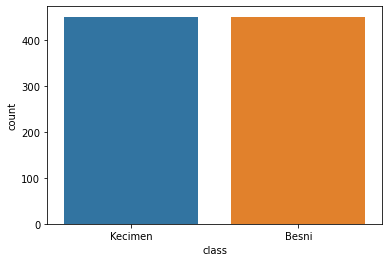

In [52]:
sns.countplot(data=df,x="class" )

In [53]:
df["class"].value_counts()

Kecimen    450
Besni      450
Name: class, dtype: int64

In [54]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1


In [61]:
#Splitting the data into training and test test
X = df.iloc[:,0:7].values
y = df.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [62]:
X

array([[551, 553, 500, ..., 542, 811, 544],
       [404, 446, 409, ..., 413, 299, 453],
       [583, 554, 581, ..., 571, 102, 573],
       ...,
       [640, 517, 739, ..., 650, 722, 656],
       [600, 633, 506, ..., 600, 177, 622],
       [529, 706, 200, ..., 532,  82, 643]])

In [63]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)


In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                80        
                                                                 
 dense_31 (Dense)            (None, 8)                 88        
                                                                 
 dense_32 (Dense)            (None, 8)                 72        
                                                                 
 dense_33 (Dense)            (None, 8)                 72        
                                                                 
 dense_34 (Dense)            (None, 2)                 18        
                                                                 
Total params: 330
Trainable params: 330
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 2s 26ms/step - loss: 29.4756 - accuracy: 0.4903 - val_loss: 18.0610 - val_accuracy: 0.5500
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 12.8921 - accuracy: 0.4972 - val_loss: 8.3281 - val_accuracy: 0.5389
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 5.7809 - accuracy: 0.5208 - val_loss: 4.0308 - val_accuracy: 0.5500
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 2.7289 - accuracy: 0.5208 - val_loss: 2.0083 - val_accuracy: 0.4833
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 1.4663 - accuracy: 0.4972 - val_loss: 1.2629 - val_accuracy: 0.6056
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 1.0557 - accuracy: 0.6194 - val_loss: 0.9556 - val_accuracy: 0.6500
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.9269 - accuracy: 0.6667 - val_loss: 0.8607 - val_accuracy: 0.6833
Epoch 8/1

Epoch 59/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8167 - val_loss: 0.3887 - val_accuracy: 0.8444
Epoch 60/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4118 - accuracy: 0.8292 - val_loss: 0.3853 - val_accuracy: 0.8444
Epoch 61/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4087 - accuracy: 0.8306 - val_loss: 0.3892 - val_accuracy: 0.8444
Epoch 62/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4064 - accuracy: 0.8306 - val_loss: 0.3842 - val_accuracy: 0.8556
Epoch 63/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4135 - accuracy: 0.8222 - val_loss: 0.3882 - val_accuracy: 0.8444
Epoch 64/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4029 - accuracy: 0.8361 - val_loss: 0.3886 - val_accuracy: 0.8444
Epoch 65/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4020 - accuracy: 0.8361 - val_loss: 0.3806 - val_accuracy: 0.8500
Epoch 

In [67]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        97
           1       0.84      0.90      0.87        83

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

[[83 14]
 [ 8 75]]


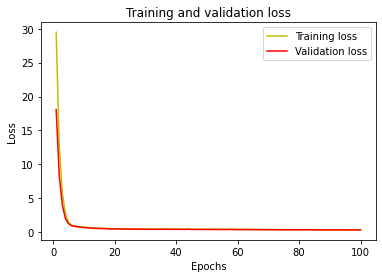

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

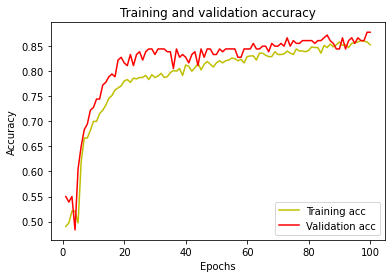

In [69]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()